# Algoritmo de Descenso del Gradiente


En este tutorial revisaremos cómo implementar el algoritmo de optimización de Descenso del Gradiente (sin derivar simbólicamente).

# Diferenciación numérica

Para no diferenciar simbólicamente, tenemos que proceder numéricamente. Este procedimiento es útil si no conocemos la derivada o es muy complicada de calcular (o simplemente no queremos hacerlo). Para empezar, cargaremos los módulos necesarios.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Podemos estimar la derivada mediante diferencias finitas. Por ejemplo:

$$f'(a) ≈ \frac{f(a+h) - f(a)}{h} $$

donde $h → 0$.

In [2]:
def derivada(f,a,h = 0.00000001):
    diff = (f(a + h) - f(a)) / h
    return diff

También podemos utilizar las diferencias centradas:

$$f'(a) ≈ \frac{f(a+h) - f(a-h)}{2h} $$

In [3]:
def derivada(f,a,h = 0.00000001):
    diff = (f(a + h) - f(a-h)) / (2*h)
    return diff

Consideremos la función $f(x) = x^2 + 1$. ¿Cuál es su argumento mínimo?

In [4]:
def f(x):
    return x**2 + 1

In [5]:
derivada(f,3)

5.999999963535174

# Descenso de la derivada

$ x_0 $ aleatorio


$$x_{n+1} = x_{n} - \alpha f'(x_n)$$

Una formulación más "programada" es:

$$ x \gets x - \alpha f'(x) $$

$\alpha>0$ es la tasa de aprendizaje. Si es muy pequeña, avanzamos muy lento, pero si es muy grande, podemos salirnos de donde queremos.
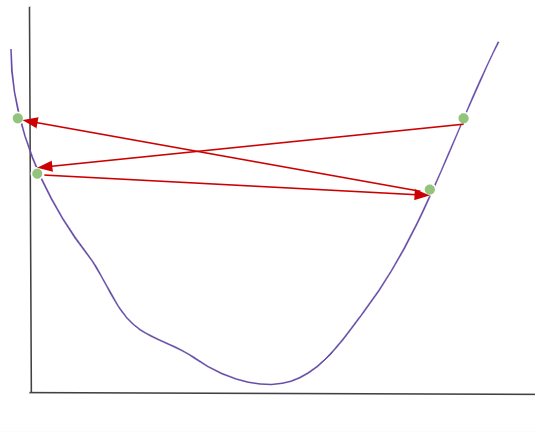



In [6]:
alpha = 0.01

El valor inicial lo escogemos aleatorio.

In [7]:
x = random.randint(-10,10)
print(x)

-7


In [8]:
f(-5)

26

In [9]:
derivada(f,x)

-13.999999737279722

In [10]:
f(x - alpha*derivada(f,x))

48.059600036045225

In [11]:
x = 1

Evaluamos nuestra función en el valor aleatorio.

In [12]:
print(x,f(x))

1 2


In [13]:
L = []

Implementación del descenso de la derivada con 10 épocas:





In [14]:
for epochs in range(10):
    x = x - alpha*derivada(f,x)
    print(x,f(x))
    L.append(f(x))

0.9800000001215494 1.960400000238237
0.9603999999431281 1.9223681598907603
0.9411919998637543 1.8858423806075333
0.9223681598214952 1.8507630222524913
0.9039207965179088 1.8170728063775707
0.8858423805314644 1.7847167231456518
0.868125532875851 1.7536419408309802
0.8507630221133979 1.723797719795522
0.8337477615795166 1.6951353299388545
0.8170728063850987 1.667607970934021


In [ ]:
for epochs in range(1000):
    x = x - alpha*derivada(f,x)
    print(x,f(x))
    L.append(f(x))

-4.003656760976355 17.02926745971168
-3.923583625298761 16.39450846471257
-3.845111953471587 15.784885934730085
-3.768209715116484 15.199404457098254
-3.6928455211199207 14.63710804285546
-3.618988611198688 14.097078567985807
-3.5466088388008643 13.578434255460415
-3.4756766631122105 13.08032826650283
-3.4061631304044226 12.601947270926456
-3.3380398678178835 12.142510159141633
-3.2712790709271644 11.701266759886092
-3.2058534895301705 11.277496596332771
-3.1417364205427134 10.87050773616454
-3.0789016920113 10.479635629070046
-3.0173236586722396 10.10424206118323
-2.9569771859644334 9.74371407831414
-2.897837642923946 9.397463004747012
-2.839880890637687 9.064923473009102
-2.7830832724734478 8.745552501521516
-2.727421606974474 8.43882862219122
-2.672873175424968 8.144251011906352
-2.619415712968305 7.861338677345253
-2.5670273992811588 7.58962966866019
-2.5156868514680752 7.328680334649357
-2.4653731147355984 7.078064594861106
-2.416065653066397 6.837373239927156
-2.367744340337481 6

Graficamos el costo.

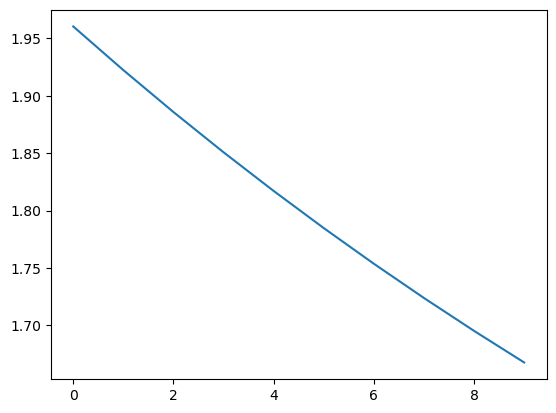

In [15]:
plt.plot(L)
plt.show()

In [ ]:
round(x,6)

-0.0

# Descenso del Gradiente

$$ \textbf{x} \gets \textbf{x} - \alpha \nabla f(\textbf{x})$$,

¡donde $\textbf{x}$ es un vector!

Consideremos la función $f(x,y) = x^2 + y^2$. ¿Cuál es el $\text{argmin}_{(x,y)} f(x,y)?$. $\nabla f(x,y) = (2x,2y)$

In [16]:
def f(v):
    x = v[0]
    y = v[1]
    return x**2 + y**2

Para calcular al vector gradiente $\nabla f(x)$, debemos considerar calcular primero las derivadas parciales:

$$ \nabla f(\textbf{x}) = \Big(  \frac{∂f}{\partial x_1}, \dots,  \frac{∂f}{\partial x_n} \Big) $$

In [17]:
def parcial(f,i,v):
    h = 0.00000001
    v_2 = v.copy()
    v_2[i] += h
    diff = (f(v_2) - f(v)) / h
    return diff

¿Cuál es la parcial de x de la función $f(x,y)$ en $(3,1)$?

In [18]:
parcial(f,1,np.array([3.,1.]))

np.float64(1.999999987845058)

Finalmente calculamos el gradiente.

In [19]:
def gradiente(f,v):
    grad = []
    for i in range(len(v)):
        grad.append(parcial(f,i,v))
    return np.array(grad)

¿Cuál es el gradiente de la función $f(x,y)$ en $(3,1)$?

In [20]:
gradiente(f,np.array([3.,1.]))

array([5.99999996, 1.99999999])

In [21]:
gradiente(f,np.array([0,0]))

array([0., 0.])

Ahora implementaremos el descenso del gradiente. Primero tomamos un vector aleatorio.

In [22]:
L = []
x = np.random.random(2)

In [23]:
x

array([0.72888811, 0.97181667])

In [24]:
alpha = 0.01

In [25]:
for epochs in range(1000):
    x = x - alpha*gradiente(f,x)
    print(x,f(x))
    L.append(f(x))

[0.71431035 0.95238033] 1.4172675725486537
[0.70002414 0.93333273] 1.3611437754492592
[0.68602366 0.91466607] 1.3072424814341297
[0.67230318 0.89637275] 1.2554756786402963
[0.65885712 0.87844529] 1.2057588414602949
[0.64567998 0.86087639] 1.1580107908781723
[0.63276638 0.84365886] 1.1121535632057145
[0.62011105 0.82678568] 1.0681122818351039
[0.60770883 0.81024997] 1.0258150354334177
[0.59555465 0.79404497] 0.9851927595492683
[0.58364356 0.77816407] 0.9461791257859287
[0.57197069 0.76260079] 0.908710432032614
[0.56053127 0.74734877] 0.8727254985212092
[0.54932065 0.7324018 ] 0.8381655681995139
[0.53833424 0.71775376] 0.8049742113118534
[0.52756755 0.70339869] 0.7730972318866718
[0.5170162  0.68933071] 0.7424825811415082
[0.50667588 0.6755441 ] 0.7130802705416002
[0.49654236 0.66203322] 0.6848422912198566
[0.48661151 0.64879255] 0.6577225361982763
[0.47687928 0.6358167 ] 0.6316767235363981
[0.46734169 0.62310037] 0.6066623249089964
[0.45799486 0.61063836] 0.5826384966245739
[0.44883496 

Y graficamos el descenso.

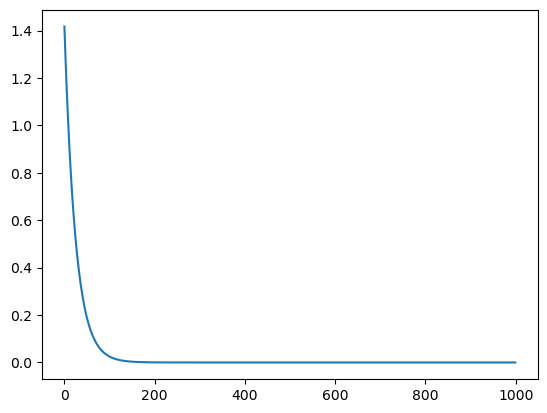

In [26]:
plt.plot(L)
plt.show()

# Aplicaciones del descenso del gradiente



## Optimización tradicional

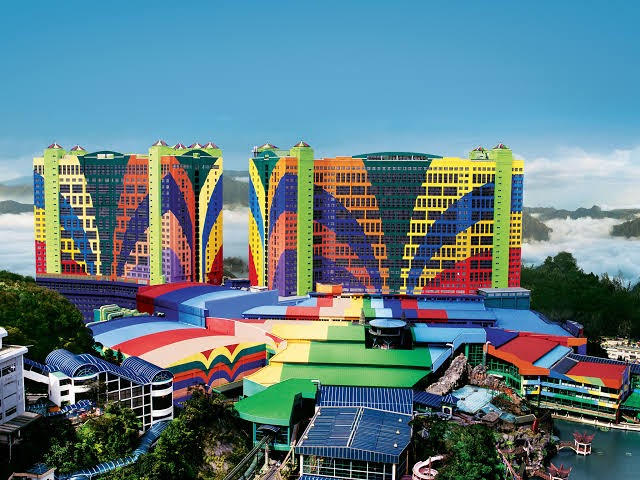

Supongamos que tenemos un hotel de 9000 recámaras. Notemos que los cuartos valen  4k por noche y manteniendo ese precio, nos fijamos que se llenan en promedio 1200 recámaras. Por lo tanto, deciden cobrar \$100 menos por noche y obtienen 200 clientes más en promedio.

$$ f(x) = (4000-100 x) (1200 + 200x)$$

In [27]:
def f(x):
    r = (4000-100*x)*(1200+200*x)
    return r

In [28]:
x = 0

In [29]:
f(x)

4800000

In [30]:
f(1)

5460000

In [31]:
alpha = 0.00001
x = random.randint(-10,10)
print(x,f(x))

-2 3360000


Implementamos el Ascenso del Gradiente

In [32]:
L = []
for epochs in range(100):
    x = x + alpha*derivada(f,x)
    print(x,f(x))
    L.append(f(x))

5.5999996624887 7980799.846094845
10.159999459981918 9644287.852251047
12.895999804139137 10243143.64784748
14.537599265575409 10458731.652462104
15.522560432553291 10536343.446490858
16.11353676021099 10564283.658490056
16.468121998012066 10574342.115820026
16.680873326957226 10577963.163331052
16.80852412432432 10579266.739780685
16.88511423021555 10579736.02519802
16.9310684800148 10579904.96891105
16.958641216158867 10579965.789019983
16.975185230374336 10579987.684544168
16.985111266374588 10579995.566512221
16.991067074239254 10579998.404056747
16.994640558958054 10579999.425527835
16.996783532202244 10579999.793086698
16.998070620000362 10579999.925549855
16.99884268641472 10579999.973212505
16.999305553734303 10579999.990354888
16.999583087861538 10579999.996523686
16.999749794602394 10579999.998747945
16.999850377440453 10579999.999552261
16.999910913407803 10579999.999841271
16.999946303665638 10579999.999942334
16.999967724084854 10579999.999979164
16.999979831278324 1057999

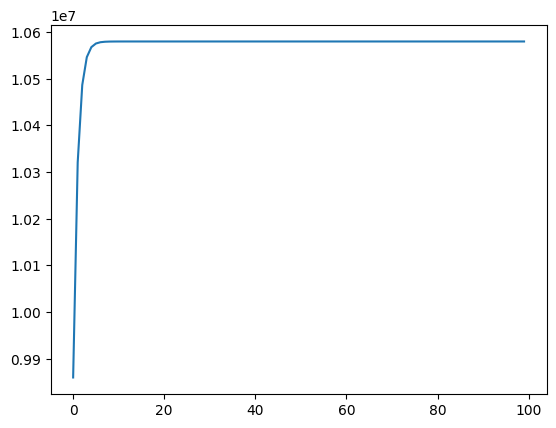

In [ ]:
plt.plot(L)
plt.show()

In [33]:
x = 9

In [34]:
4000-100*x

3100

In [35]:
1200+200*x <= 3000

True

$$1200 + 200x \le 3000$$

$$ 200x \le 1800 $$

$$ x \le 9 $$

In [36]:
x = 0
while 1200+200*x <= 3000:
    x+=1
print(x-1)

9


In [37]:
1200+200*x

3200

In [38]:
f(x)

9600000

## Regresión lineal

En la vida real, para poder afirmar que por cada 100 veces que reduzca el precio gano 200 clientes, debo conocer cómo se comportan las ganancias en clientes con respecto a la reducción de mis precios. Para hacer eso, tenemos que hacer observaciones y registrarlas. Después, debemos tener un **modelo** de este comportamiento. Un modelo preliminar es el modelo lineal.

La regresión lineal puede resolverse con la función de costo de Suma de Errores Cuadráticos, dada por:

$$ \mathcal{L}(\theta) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_{\theta,i} - y_i)^2    $$

donde $\theta$ son los paramétros del modelo, $\hat{y}_{\theta}$ es nuestra predicción y $y$ el valor real.


Supongamos que primero reduje el precio una vez y obtuve 200 clientes más. En otra ocasión, reduje el precio dos veces y vinieron 360 clientes. Y así sucesivamente hasta recopilar los siguientes datos.

In [47]:
x = np.array([1,2,1,2,3,4])
y = np.array([200,360,220,390,650,910])

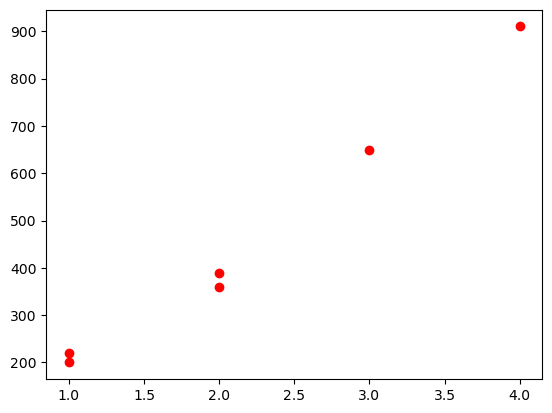

In [48]:
plt.scatter(x,y,color='red')
plt.show()

La ecuación de la recta está dada por

$$ y = \theta_1 x + \theta_0 $$


In [44]:
m = 2

def recta(theta,x):
    return theta[0] + theta[1]*x

Para un polinomio, sería:

$$ p_{\theta}(\textbf{x}) = \sum_{i=0}^{m} \theta_i x^i  $$

In [45]:
m = 3
def polinomio(theta,x,m=m):
    suma = 0
    for i in range(m+1):
        suma += theta[i]*x**i

Utilizando la ecuación de la recta, el costo está dado por:

$$ \mathcal{L}(\theta) = \frac{1}{n} \sum_{i=1}^{n} (\theta_1 x_i + \theta_0  - y_i)^2    $$

In [46]:
def Loss(theta):
    suma = 0
    n = len(x)
    for i in range(n):
        x_i = x[i]
        y_i = y[i]
        suma += (recta(theta,x_i)-y_i)**2
    return suma / n

Adivinemos los mejores parámetros:

In [49]:
m = 2
theta = np.random.random(m)
y_pred = recta(theta,x)
theta

array([0.68220958, 0.37374388])

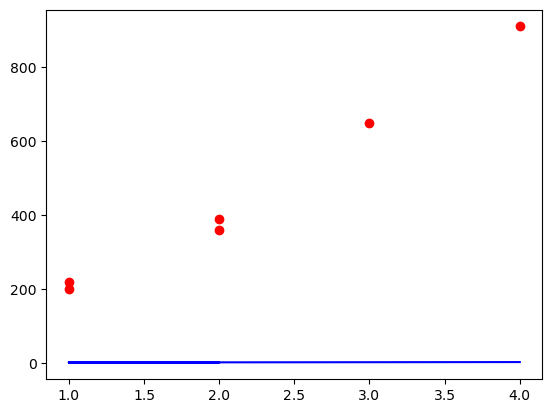

In [51]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()

In [ ]:
Loss(theta)

268029.6349455587

Finalmente aplicamos el algoritmo de Descenso del Gradiente

In [52]:
P = []

In [53]:
for _ in range(10000):
  theta = theta - alpha*gradiente(Loss,theta)
  print(theta,Loss(theta))
  P.append(Loss(theta))

[0.69127979 0.39870402] 268492.11249125795
[0.70034872 0.42366085] 268421.60826335073
[0.70941637 0.44861435] 268351.1228670765
[0.71848267 0.4735646 ] 268280.65620621684
[0.72754782 0.49851159] 268210.20811875834
[0.73661163 0.5234552 ] 268139.7790496274
[0.74567427 0.54839556] 268069.36854643485
[0.75473557 0.57333259] 267998.97690885357
[0.76379559 0.59826625] 267928.60422547534
[0.77285439 0.62319665] 267858.2501495596
[0.78191191 0.64812373] 267787.914875206
[0.79096821 0.67304755] 267717.5982008809
[0.80002323 0.69796806] 267647.3003206319
[0.80907696 0.72288524] 267577.02123068995
[0.81812948 0.74779917] 267506.76072960265
[0.82718071 0.77270978] 267436.51901133935
[0.83623072 0.79761707] 267366.2960194622
[0.84527945 0.8225211 ] 267296.0916579481
[0.8543269  0.84742181] 267225.90606801043
[0.86337307 0.87231921] 267155.73924588336
[0.87241801 0.89721335] 267085.5909902766
[0.88146174 0.92210422] 267015.4612975048
[0.89050412 0.94699172] 266945.350558827
[0.89954523 0.97187596] 

In [54]:
y_pred = recta(theta,x)


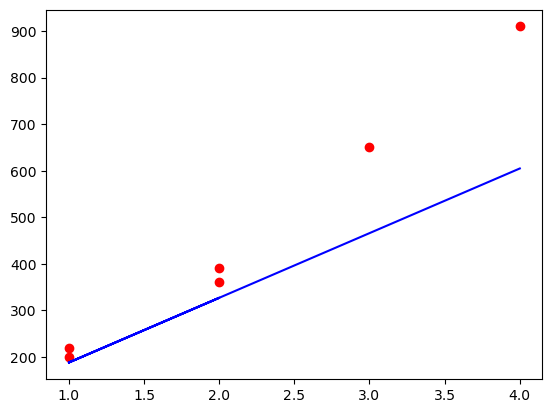

In [55]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()

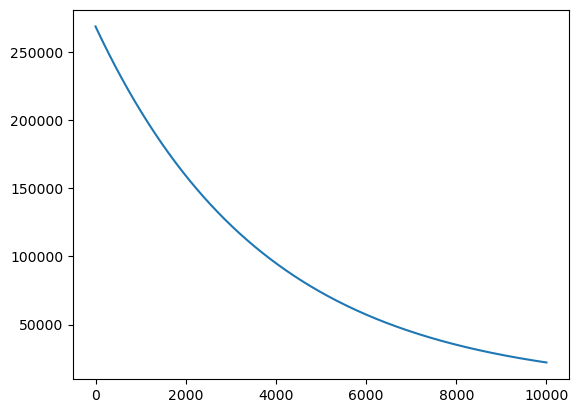

In [56]:
plt.plot(P)
plt.show()

In [57]:
theta

array([ 48.99000436, 138.97064234])

In [58]:
recta(theta,5)

np.float64(743.8432160688312)

Volviendo al ejemplo original:

In [59]:
def f(x):
  r = (4000-100*x)*(1200+recta(theta,x))
  return r

In [60]:
alpha = 0.0000001
x = random.randint(0,10)
print(x,f(x))

0 4995960.017428342


In [61]:
derivada(f,10,h=0.0000000001)

np.float64(153048.89529943466)

In [62]:
L = []
for epochs in range(10000):
  x = x + alpha*derivada(f,x,h=0.001)
  print(x,f(x))
  L.append(f(x))

0.043098356893379236 5014508.88774022
0.08607692565992474 5032954.791407759
0.1289360392403323 5051298.3000091715
0.17167602964979595 5069539.981949728
0.21429722798089496 5087680.40247951
0.25679996440573594 5105720.123710739
0.2991845681790262 5123659.704635417
0.3414513676400296 5141499.701142394
0.3836006902155932 5159240.666034797
0.42563286242252213 5176883.149047096
0.46754820987004786 5194427.696862107
0.5093470572623889 5211874.853127949
0.5510297284013126 5229225.158474913
0.5925965461886022 5246479.150532194
0.6340478326285258 5263637.363944537
0.6753839088303969 5280700.330388833
0.7166050950109494 5297668.578590544
0.7577117104971316 5314542.634340223
0.7987040737281088 5331323.020509602
0.8395825022581034 5348010.257067954
0.8803473127587234 5364604.861098155
0.9209988210213371 5381107.3468126645
0.9615373419596348 5397518.225569515
1.0019631896120496 5413838.005888143
1.042276677144086 5430067.193465112
1.082478116851067 5446206.291189904
1.1225678201600442 5462255.79916

In [ ]:
4000-100*x

2335.26106934611

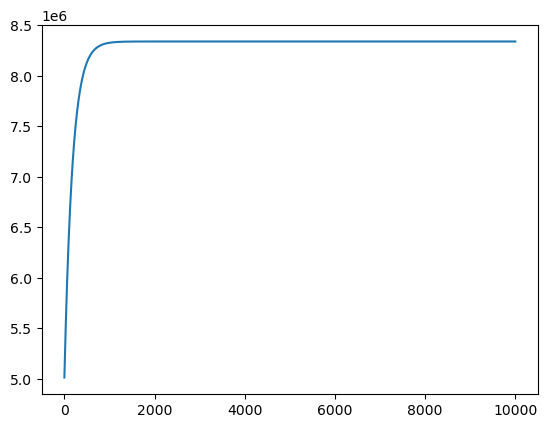

In [63]:
plt.plot(L)
plt.show()

## Redes Neuronales Artificiales

### Problema OR

Consideremos el problema OR: dadas las entradas binarias $\textbf{x}_0$ y $\textbf{x}_1$, calcular $\textbf{x}_0 \lor \textbf{x}_1$.

Lo que sabemos es

| $\textbf{x}_0$ | $\textbf{x}_1$| $y$ |
|---------|---------|--------|
|   0     |   0     |   0    |
|   0     |   1     |   1    |
|   1     |   0     |   1    |
|   1     |   1     |   1    |

O bien, el dataset:

$\{ ( (0,0) , 0 ), ((0,1),1), ((1,0),1), ((1,1),1) \}$

In [64]:
X = [np.array([1,0,0]),np.array([1,0,1]),np.array([1,1,0]),np.array([1,1,1])]
Y = [0,1,1,1]

Una red neuronal sencilla puede proponerse con la siguiente arquitectura:

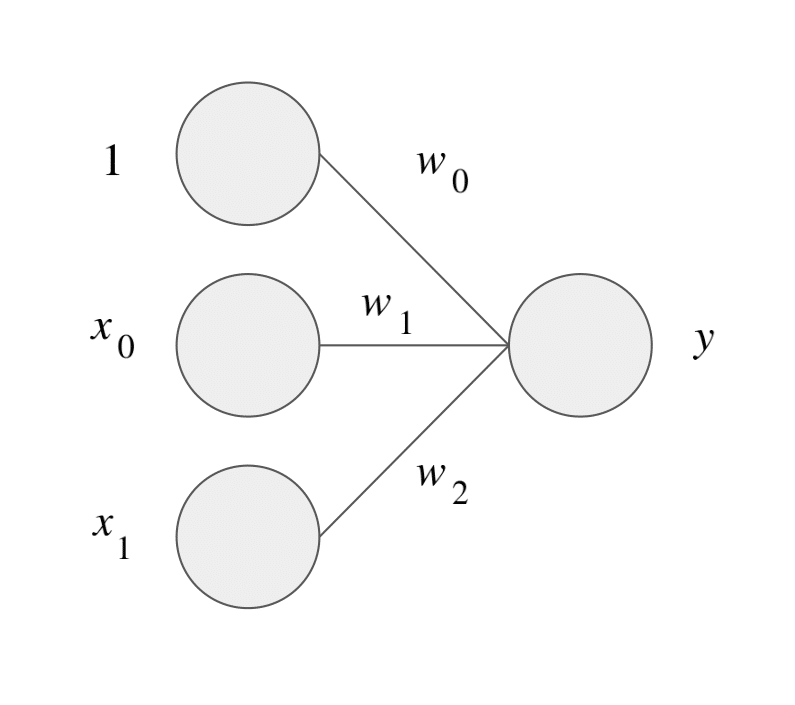

Es decir, si tomamos el vector de entrada $\textbf{x}$ añadiendo un uno para la neurona bias, la salida de la neurona de clasificación está dada por

$$ y = f(\textbf{w}\cdot \textbf{x}) $$

donde $f$ es la función de activación.

In [ ]:
def f(x):
  if x > 1/2:
    return 1
  else:
    return 0

def nn(w,x):
  return (np.dot(w,x))

La función de costo es igual la Suma de Errores Cuadráticos:


$$ \mathcal{L}(\theta) = \frac{1}{n}  \sum_i (NN_{\theta}(\textbf{x}_i) - y_i)^2  $$

Para calcular el costo, resulta mejor no utilizar la función de activación.

In [ ]:
def Loss(w):
  suma = 0
  n = len(X)
  for i in range(n):
    x_i = X[i]
    y_i = Y[i]
    suma += (nn(w,x_i) -y_i)**2
  return suma / n

In [ ]:
alpha = 0.01
w = np.random.random(3)

In [ ]:
w

array([0.70098188, 0.60530086, 0.0477918 ])

In [ ]:
P = []

for _ in range(1000):
  w = w - alpha*gradiente(Loss,w)
  print(w,Loss(w))
  P.append(Loss(w))

[0.69543131 0.60199908 0.04727756] 0.18927796026264082
[0.69002992 0.59878838 0.04684047] 0.1853653272047871
[0.68477303 0.595666   0.04647783] 0.1816652226039124
[0.67965613 0.59262922 0.04618699] 0.17816460002509218
[0.67467485 0.58967543 0.04596541] 0.17485122871742273
[0.66982494 0.5868021  0.04581063] 0.17171364226445726
[0.66510232 0.58400678 0.04572027] 0.16874109089396042
[0.660503   0.58128709 0.04569201] 0.16592349648425447
[0.65602315 0.57864072 0.04572362] 0.1632514104716695
[0.65165904 0.57606547 0.04581295] 0.16071597440871246
[0.64740708 0.57355916 0.0459579 ] 0.15830888290695805
[0.64326377 0.57111971 0.04615646] 0.1560223491445782
[0.63922573 0.56874509 0.04640666] 0.1538490721619299
[0.6352897  0.56643335 0.04670661] 0.15178220658603067
[0.6314525  0.56418258 0.04705448] 0.1498153339847183
[0.62771108 0.56199096 0.04744849] 0.14794243614997385
[0.62406247 0.5598567  0.04788694] 0.14615787005558253
[0.62050378 0.55777807 0.04836817] 0.14445634425373743
[0.61703224 0.55

Veamos si funciona

In [ ]:
x = np.array([1,1,0])
f(nn(w,x))

1

¿Puedes implementar una forma de entrenar una pequeña red neuronal para la función AND?